<a href="https://colab.research.google.com/github/Divya-agrwl/dogs-vs-catsclassification/blob/main/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras import layers
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import matplotlib

In [7]:
#generators
train_ds= keras.utils.image_dataset_from_directory(
  directory =  '/content/train',
  labels='inferred',
  label_mode = 'int',
  batch_size=32,
  image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
  directory =  '/content/test',
  labels='inferred',
  label_mode = 'int',
  batch_size=32,
  image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
#Normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

  train_ds=train_ds.map(process)
  validation_ds=validation_ds.map(process)

In [12]:
#CNN Model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1,activation="sigmoid"))

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history= model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 83ms/step - accuracy: 0.5409 - loss: 2.4062 - val_accuracy: 0.6006 - val_loss: 1.0568
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 89ms/step - accuracy: 0.6610 - loss: 0.6327 - val_accuracy: 0.6468 - val_loss: 0.6565
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 86ms/step - accuracy: 0.7293 - loss: 0.5478 - val_accuracy: 0.6102 - val_loss: 1.0397
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.7721 - loss: 0.4800 - val_accuracy: 0.7818 - val_loss: 0.4638
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.8192 - loss: 0.3995 - val_accuracy: 0.7964 - val_loss: 0.4609
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 81ms/step - accuracy: 0.8564 - loss: 0.3247 - val_accuracy: 0.6988 - val_loss: 0.9828
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 86ms/step - accuracy: 0.8941 - loss: 0.2627 - val_accuracy: 0.7980 - val_loss: 0.6329
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 80ms/step - accuracy: 0.9256 - loss: 0.1911 - 

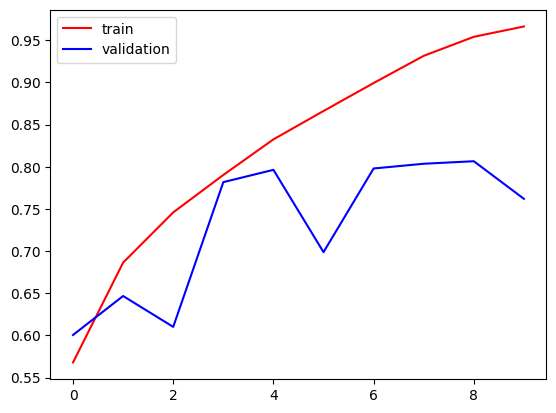

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#ways to reduce overfitting

#Add more data
#Data Augmentation-create more data than avaliable data
#L1/L2Regularizer
#Dropout
#Batch Norm
#Reduce complexity

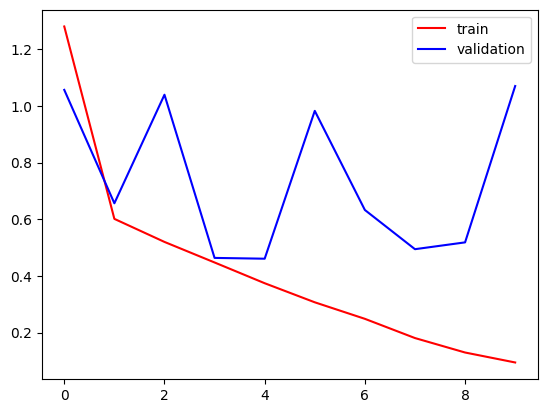

In [17]:

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [18]:
import cv2


In [19]:
test_img=cv2.imread('/content/sampledog.jpg')

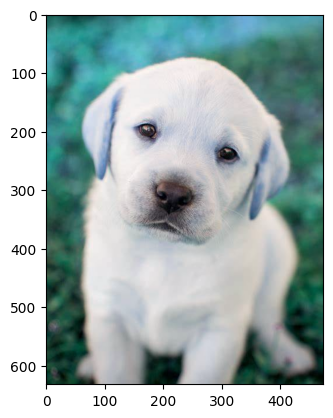

In [20]:
plt.imshow(test_img)

In [21]:
test_img.shape

(632, 474, 3)

In [22]:
test_img =cv2.resize(test_img,(256,256))


In [23]:
test_input = test_img.reshape((1,256,256,3))

In [24]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step


array([[0.9999385]], dtype=float32)

In [25]:
threshold = 0.5
class_label = (model.predict(test_input) > threshold).astype(int)
print(class_label)
if class_label == 0:
  print("Cat")
else:
  print("Dog")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[1]]
Dog


In [26]:
import cv2

In [27]:
test_img=cv2.imread('/content/samplecat.jpg')

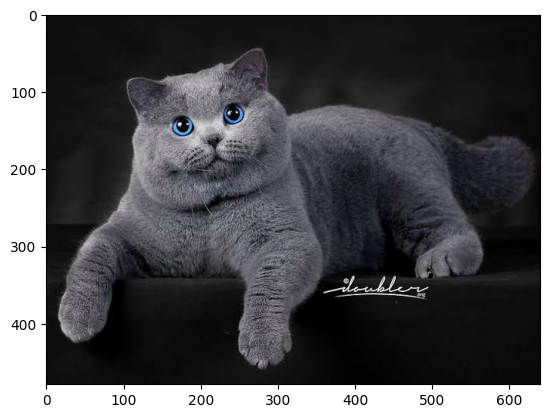

In [28]:
plt.imshow(test_img)

In [29]:
test_img.shape

(479, 640, 3)

In [30]:
test_img =cv2.resize(test_img,(256,256))

In [31]:
test_input = test_img.reshape((1,256,256,3))

In [32]:
threshold = 0.5
class_label = (model.predict(test_input) > threshold).astype(int)
print(class_label)
if class_label == 0:
  print("Cat")
else:
  print("Dog")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0]]
Cat
